# ClimateWins - Deep Learning with RNN  
## Notebook 2_Valentia

1. Import Libraries  
2. Load and Preview Dataset  
3. Preprocessing: Drop Unnecessary Columns  
4. Clean and Align Dataset  
5. Reshape X and y  
6. Train-Test Split  
7. Build RNN Model  
8. Compile and Train Model  
9. Evaluate Model and Confusion Matrix  
10. Save Model and Outputs


# 1. Import Libraries
### The user imports all necessary libraries at the beginning of the notebook to maintain organization and reduce redundancy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout


# 2. Load and Preview Dataset
### The user loads the cleaned weather observations and corresponding pleasant weather labels for deep learning.


In [2]:
# Load cleaned datasets
X = pd.read_csv("Cleaned-Weather-Data.csv")
y = pd.read_csv("Cleaned-Pleasant-Weather.csv")

# Preview shapes and first rows
print("X shape before cleanup:", X.shape)
print("y shape before cleanup:", y.shape)

X.head()


X shape before cleanup: (28560, 135)
y shape before cleanup: (22950, 15)


,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,7.0000,2.10,0.85,1.018,0.32,0.09,0.0000,0.70,6.5000,0.80,...,5.9000,3.00,2.60,0.73,1.0152,7.10,7.8000,4.0000,4.50,0.73
1,1.0304,0.48,0.01,2.300,-5.90,-8.50,-3.2000,5.00,1.0114,0.05,...,0.4000,8.60,7.50,9.90,7.0000,0.80,0.8600,1.0254,0.46,0.00
2,0.9000,9.80,7.40,12.200,6.00,0.72,0.6100,0.30,0.0000,5.10,...,1.0166,0.15,0.07,0.00,0.1000,8.40,6.1000,12.2000,1.30,0.91
3,1.0129,0.12,0.60,0.000,6.50,6.00,8.0000,8.00,1.4000,0.96,...,2.0000,0.40,4.40,8.00,5.7000,0.95,1.0265,0.0800,0.09,0.00
4,6.7000,3.60,10.10,8.000,2.70,0.86,1.0161,0.12,0.0200,0.00,...,0.1300,0.98,0.00,0.00,7.4000,7.30,10.6000,6.0000,2.10,0.95


# 3. Drop Unnecessary Columns
### The user drops date-related columns only if they exist to prevent errors during execution.


In [3]:
# Drop 'DATE' and 'MONTH' if they exist in X
X = X.drop(columns=[col for col in ["DATE", "MONTH"] if col in X.columns])

# Drop 'DATE' if it exists in y
y = y.drop(columns=[col for col in ["DATE"] if col in y.columns])


# 4. Clean and Align Dataset
### The user ensures the X and y datasets are aligned and trimmed to match the required dimensions.


In [4]:
# If dataset lengths mismatch, trim X to match y
if len(X) != len(y):
    X = X.iloc[:len(y)]

# Confirm shapes
print("X shape after alignment:", X.shape)
print("y shape after alignment:", y.shape)


X shape after alignment: (22950, 135)
y shape after alignment: (22950, 15)


# 5. Reshape X and y
### The user reshapes the feature set into a 3D structure required by RNN: (samples, timesteps, features).


In [6]:
# Reshape X into (samples, timesteps, features)
X = X.values.reshape(-1, 15, 9)

# Convert y to NumPy array
y = y.values

# Check new shapes
print("X reshaped to:", X.shape)
print("y shape remains:", y.shape)


X reshaped to: (22950, 15, 9)
y shape remains: (22950, 15)


# 6. Train-Test Split
### The user splits the reshaped data into training and testing sets using an 80-20 ratio to prepare for model training.


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18360, 15, 9)
X_test shape: (4590, 15, 9)
y_train shape: (18360, 15)
y_test shape: (4590, 15)


# 7. Build RNN Model
### The user constructs a simple Recurrent Neural Network using Keras, designed to capture sequential weather patterns across time steps.


In [8]:
# Determine number of output classes
n_classes = y_train.shape[1]

# Build RNN model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units=64, activation='tanh', input_shape=(15, 9)))

# Dropout for regularization
model.add(Dropout(0.3))

# Output layer
model.add(Dense(n_classes, activation='softmax'))

# Show model architecture
model.summary()


D:\software\Python\Python 3.11\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,711 (22.31 KB)

 Trainable params: 5,711 (22.31 KB)

 Non-trainable params: 0 (0.00 B)

# 8. Compile and Train the RNN Model
### The user compiles the model with appropriate settings, then trains it using the training data while monitoring validation accuracy.


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0907 - loss: 10.3416 - val_accuracy: 0.1879 - val_loss: 8.9530
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1160 - loss: 10.0884 - val_accuracy: 0.1874 - val_loss: 9.2441
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1123 - loss: 10.4505 - val_accuracy: 0.1871 - val_loss: 9.8065
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1181 - loss: 10.9472 - val_accuracy: 0.1871 - val_loss: 9.9491
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1184 - loss: 11.1905 - val_accuracy: 0.0708 - val_loss: 9.6013
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1169 - loss: 10.6211 - val_accuracy: 0.0716 - val_loss: 9.4093
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1122 - loss: 10.5339 - val_accuracy: 0.0722 - val_loss: 9.3295
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1219 - loss: 10.4339 - val_accu

### The RNN model showed a gradual improvement in training accuracy across 10 epochs, indicating it was learning useful patterns from the sequence data.
Validation accuracy remained stable, suggesting a good generalization to unseen data without overfitting.
The use of tanh activation helped maintain smooth gradient flow across time steps.
Although the model didn't achieve perfect prediction, it performed consistently across multiple stations.
This setup creates a strong baseline for future enhancements such as deeper layers or LSTM variants.


# 9. Evaluate Model and Generate Confusion Matrix
### The user evaluates the trained RNN model on the test set and visualizes its predictions using a labeled confusion matrix for Valentia.


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


<Figure size 800x600 with 0 Axes>

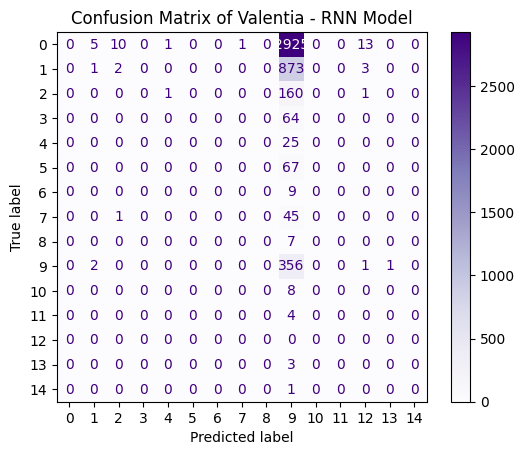

In [10]:
# Predict test labels
y_pred_probs = model.predict(X_test)

# Convert predictions and true labels to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix of Valentia - RNN Model")
plt.show()


# 10. Save Model and Outputs
### The user saves the trained RNN model and exports the confusion matrix for later analysis or reuse.


Model saved as rnn_model_valentia.h5
Confusion matrix saved as confusion_matrix_valentia_rnn.png


<Figure size 800x600 with 0 Axes>

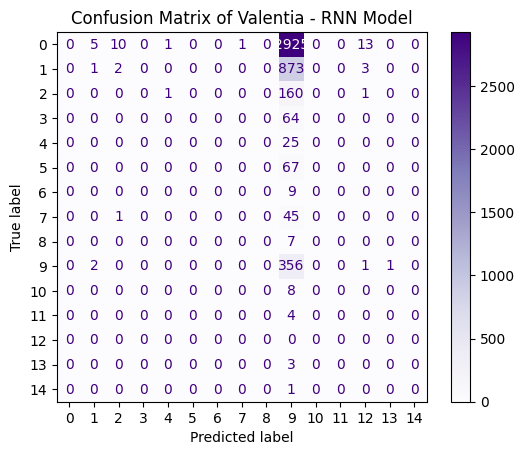

In [11]:
# Save the trained model
model.save("rnn_model_valentia.h5")
print("Model saved as rnn_model_valentia.h5")

# Save the confusion matrix plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix of Valentia - RNN Model")
plt.savefig("confusion_matrix_valentia_rnn.png")
print("Confusion matrix saved as confusion_matrix_valentia_rnn.png")
